In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from khipu.plot import plot_khipugram
try:
    import matplotlib.pyplot as plt
except:
    print("[khipu.utils] cannot import matplotlib, skipping.")

In [100]:
def plot_khipugram(df, savepdf='', relabel={}, line_color=[]):
    '''Plot the khipu grid as diagram.
    df = KP.get_khipu_intensities()
    The trunk labels are updated here but not in KP instances, because
    we use the search adduct tables to index m/z distances to M+H+,
    and it's easier to keep the names consistent with the input tables.  
    '''
    _M, _N = df.shape
    zdata = []
    for ii in range(_M):
        for jj in range(_N):
            zdata.append((jj, ii, df.iloc[ii, jj]))

    X = [d[0] for d in zdata]
    Y = [d[1] for d in zdata]
    S = [(np.log2(d[2]+1))**4 / 700 for d in zdata]

    trunk_labels = list(df.columns)
    _base = trunk_labels[0]
    trunk_labels = [_base] + [_base+","+x for x in trunk_labels[1:]]
    if relabel:
        trunk_labels = [relabel.get(x, x) for x in trunk_labels]
    
    fig, ax = plt.subplots(1, 1, figsize=(9, 3))
    for jj in range(_N):
        # ax.text(jj, -1, trunk_labels[jj], rotation=60)
        if line_color:
            ax.plot([jj]*_M, range(_M), marker='o', linestyle='--', markersize=0.1, color=line_color[jj])
        else:
            ax.plot([jj]*_M, range(_M), marker='o', linestyle='--', markersize=0.1)

    ax.plot([-1, _N+1], [0,0], linestyle='-', linewidth=2, color='k', alpha=0.3)
    ax.scatter(X, Y, c='red', s=S, alpha=0.8)
    for ii in range(_M):
        ax.text(_N+1.6, ii, df.index[ii])

    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()
    fig.tight_layout()
    if savepdf:
        plt.savefig(savepdf)
    else:
        plt.show()

In [3]:
pd.read_csv('214_example_from_asari_singlefile.csv')

,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,214
0,F11977,474.3085,616.49,612.99,619.98,8094,3145876,1,0.99,143,1,3177948
1,F11923,473.3055,616.49,613.63,619.98,8084,20229531,1,0.95,1082,1,20250531
2,F11881,472.3022,616.17,613.63,619.67,8075,71734882,1,0.98,7452,1,71754882
3,F12433,452.3264,616.80,612.99,620.30,7873,7403088,1,0.99,756,1,7428649
4,F12397,451.3236,616.49,612.99,620.30,7866,50348265,1,0.97,3610,1,50372265
5,F12350,450.3203,616.49,613.31,620.30,7858,182439107,1,0.97,1541,1,182462107
6,F11307,434.3162,616.49,613.63,619.98,7704,8913022,1,0.96,981,1,8934022
7,F11236,433.3132,616.49,613.63,620.30,7693,59960742,1,0.95,773,1,59982742
8,F11143,432.3098,616.49,613.31,620.30,7683,226969189,1,0.96,351,1,226992189
9,F9419,416.3054,616.17,613.95,616.80,7439,4273085,1,0.72,1006,1,4283085


In [43]:
kp_df = pd.DataFrame({
    '': ['M0', '13C/12C', '13C/12C*2'],
    'M+H+': [182462107, 50372265, 7428649],
    'Na/H': [71754882, 20250531, 3177948],
    'M+H-H2O': [226992189, 59982742, 8934022],
    'M+H-2H2O': [257289382, 68667267, 4283085],
})
kp_df.set_index('', inplace=True)

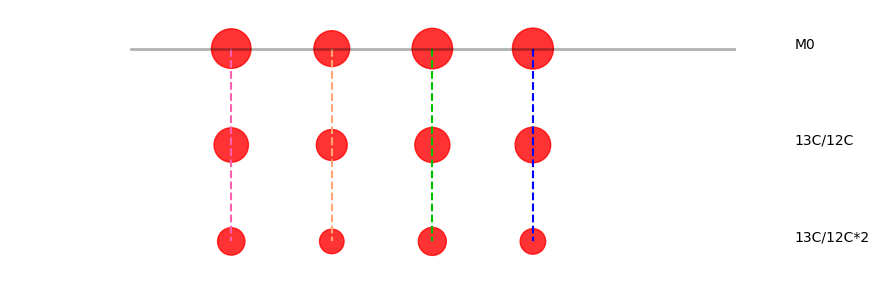

In [ ]:
plot_khipugram(kp_df, savepdf='2e_kp.pdf', line_color=['#FF5FAF', '#FFA577', '#00C000', '#0000FF'])

8934022
7	F11236	433.3132	616.49	613.63	620.30	7693	59960742	1	0.95	773	1	59982742
8	F11143	432.3098	616.49	613.31	620.30	7683	226969189	1	0.96	351	1	226992189
9	F9419	416.3054	616.17	613.95	616.80	7439	4273085	1	0.72	1006	1	4283085
10	F9305	415.3027	616.49	613.95	620.30	7425	68646267	1	0.96	593	1	68667267
11	F9172	414.2993	616.49	613.63	620.30	7407	257267382	1	0.96	248	1	257289382